# Week 6 Lab session

We will Implement:
- Bubble sort,
- Merge sort, and

Take home assignment: Quick_sort  

(a) Compare the runtimes in best case and worst case scenarios. 

(b) Demonstrate the (perceptible) divergence in the two runtimes - n^2 and (nlogn) for certain real-world cases

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
! pip install -U memory_profiler

  Created wheel for memory-profiler: filename=memory_profiler-0.59.0-py3-none-any.whl size=31313 sha256=f194fe01f8bf5072eeca68f92f6190bd0b6a4cc4969aa966cc68317081ed62c4
  Stored in directory: /root/.cache/pip/wheels/8d/6e/d2/af9dae73f8fef0c64c18b0a02a69fbd4c65b854912fa87a390
Successfully built memory-profiler


In [ ]:
import memory_profiler

In [ ]:
from memory_profiler import profile

#### Let's **import random** package and use random.sample method to generate a list of numbers in the given range. This list will later be used for sorting, while implementing the different sorting algorithms.

In [ ]:
#The 'random' module is a package from the python standard library, it has function random as well.
import random 

#This module provides various time-related functions.
import time

In [ ]:
sm_data = random.sample(range(0, 100), 10)    # Pick a random number between 1 and 100. Generate 10 random sample
print(sm_data)

[22, 64, 75, 60, 69, 83, 21, 58, 67, 59]


In [ ]:
lg_data = random.sample(range(0, 100000), 100000)    # Pick a random number between 1 and 10000. Generate 2000 random sample
print(lg_data)

[67712, 57509, 78962, 93648, 20287, 37503, 67475, 28072, 3515, 19027, 24405, 38782, 78634, 17796, 30993, 39551, 90151, 83084, 29320, 49313, 99831, 72381, 74619, 4809, 70841, 85154, 55222, 88526, 7620, 85231, 92501, 62284, 15999, 17540, 93270, 4302, 99914, 96092, 26871, 9200, 65329, 98727, 18093, 32492, 55862, 89167, 81044, 22210, 97142, 62228, 35147, 34230, 23446, 58579, 524, 25068, 83769, 16028, 11960, 25050, 43212, 28295, 1916, 65412, 54906, 49880, 58556, 89188, 29648, 17601, 74075, 27442, 873, 70892, 35533, 87515, 64406, 74805, 75495, 4059, 7374, 42197, 86013, 52113, 72331, 30914, 77384, 95932, 75907, 6636, 97069, 23843, 2143, 71508, 25679, 87860, 24135, 72246, 60447, 92618, 68053, 58758, 81655, 15970, 93168, 95487, 58145, 76160, 46830, 69140, 2955, 96468, 76242, 12857, 73733, 12129, 54746, 70168, 74490, 8002, 67691, 70709, 7563, 92255, 95172, 12667, 82918, 91896, 64482, 36110, 40044, 97965, 24899, 37815, 1712, 22176, 72562, 82464, 73950, 6074, 47752, 4926, 50328, 34062, 41470, 8878

In [ ]:
import copy

b_small_data = copy.deepcopy(sm_data)

b_large_data = copy.deepcopy(lg_data)

m_small_data = copy.deepcopy(sm_data)

m_large_data = copy.deepcopy(lg_data)

## Bubble Sort

**Bubble Sort (Profile)**
* Worst complexity: n^2 (If we want to sort the elements in ascending order and the array is in descending order.)
* Average complexity: n^2
* Best complexity: n (If the array is already sorted, then there is no need for sorting.)
* Space complexity: 1 (in-place)
* Method: Exchanging
* Stable: Yes
* Class: Comparison sort


In [ ]:
# Optimized Bubble sort in Python
def bubbleSort(lis_arr):
  # loop through each element of array
  swap_count = 0
  iter = 0
  for i in range(len(lis_arr)):
    iter += 1
    # keep track of swapping
    swapped = False
    
    # loop to compare array elements
    for j in range(0, len(lis_arr) - i - 1):

      # compare two adjacent elements
      # change > to < to sort in descending order
      if lis_arr[j] > lis_arr[j + 1]:
        # swapping occurs if elements
        # are not in the intended order
        
        temp = lis_arr[j]
        lis_arr[j] = lis_arr[j+1]
        lis_arr[j+1] = temp
        # increment the swap counter
        swapped = True
        swap_count += 1
        iter += 1
    #   iter += 1
    # iter += 1
          
    # no swapping means the array is already sorted
    # so no need for further comparison
    if not swapped:
      print('Swaps made: '+ str(swap_count), '\nIterations:', iter)
      break
  iter += 1
  return iter

In [ ]:
#data for bubble sort algorithm
data = [5,3,4,2,1]

In [ ]:
bubbleSort(data)

Swaps made: 9 
Iterations: 5


6

In [ ]:
%load_ext memory_profiler

In [ ]:
strt = time.perf_counter()
bubbleSort(data) 
end = time.perf_counter()
print(f"time taken to sort the list is {end - strt:0.4f} seconds")
print(f'Sorted list in Ascending Order:{data}')

Swaps made: 0
time taken to sort the list is 0.0002 seconds
Sorted list in Ascending Order:[1, 5, 6, 9, 10, 12]


In [ ]:
strt = time.perf_counter()
%memit bubbleSort(data)   #%memit adds extra time for running
end = time.perf_counter()
#print(f'Sorted list in Ascending Order:{data}')

Swaps made: 0
Swaps made: 0
Swaps made: 0
Swaps made: 0
Swaps made: 0
Swaps made: 0
Swaps made: 0
peak memory: 125.34 MiB, increment: 0.00 MiB


In [ ]:
strt = time.perf_counter()
%memit bubbleSort(large_data)
end = time.perf_counter()
print(f"time taken to sort the list is {end - strt:0.4f} seconds")
print(f'Sorted list in Ascending Order:{large_data}')

NameError: ignored

## Merge sort

**Merge sort (Profile)**
* Inventor: John von Neumann
* Worst complexity: n*log(n)
* Average complexity: n*log(n)
* Best complexity: n*log(n)
* Space complexity: n (requires reallocation of the size of array length)
* Method: Merging
* Stable: Yes
* Class: Comparison sort

In [ ]:
def mergeSort(x):
    mergeSort.count += 1

    # 1. Store the length of the list
    list_length = len(x)

    # 2. List with length less than is already sorted
    if list_length == 1:
        return x

    # 3. Identify the list midpoint and partition the list into a left_partition and a right_partition
    mid_point = list_length // 2

    # 4. To ensure all partitions are broken down into their individual components,
    # the merge_sort function is called and a partitioned portion of the list is passed as a parameter
    left_partition = mergeSort(x[:mid_point])
    right_partition = mergeSort(x[mid_point:])
 
    # 5. The merge_sort function returns a list composed of a sorted left and right partition.
    return merge(left_partition, right_partition)


# 6. takes in two lists and returns a sorted list made up of the content within the two lists
def merge(left, right):
    merge.count += 1

    # 7. Initialize an empty list output that will be populated with sorted elements.
    # Initialize two variables i and j which are used pointers when iterating through the lists.
    output = []
    i = j = 0

    # 8. Executes the while loop if both pointers i and j are less than the length of the left and right lists
    while i < len(left) and j < len(right):
        # 9. Compare the elements at every position of both lists during each iteration
        if left[i] < right[j]:
            # output is populated with the lesser value
            output.append(left[i])
            # 10. Move pointer to the right
            i += 1
        else:
            output.append(right[j])
            j += 1
    # 11. The remnant elements are picked from the current pointer value to the end of the respective list
    output.extend(left[i:])
    output.extend(right[j:])

    return output


def run_merge_sort(data):
    print(data)
    mergeSort.count, merge.count = 0, 0
    sorted_list = mergeSort(data)
    print(sorted_list)

x = [6, 5, 12, 10, 9, 1]
run_merge_sort(x)
print('number of iterations:', mergeSort.count + merge.count)

[6, 5, 12, 10, 9, 1]
[1, 5, 6, 9, 10, 12]
number of iterations: 16


In [ ]:
data = [1,2,3,3,3,4,5,6,6,6]

In [ ]:
mergeSort(data)
# print(f"time taken to sort the list is {end - strt:0.4f} seconds")
# print(f'Sorted list in Ascending Order:{data}')
print(data)
print('Swaps:'+ str(swap_count[0]))

[1, 2, 3, 3, 3, 4, 5, 6, 6, 6]
Swaps:0


In [ ]:
strt = time.perf_counter()
%memit mergeSort(data)
end = time.perf_counter()
print(f'Sorted list in Ascending Order:{data}')

peak memory: 125.40 MiB, increment: 0.01 MiB
Sorted list in Ascending Order:[1, 2, 3, 3, 3, 4, 5, 6, 6, 6]


**Lets try small and large data**

In [ ]:
strt = time.perf_counter()

#%memit mergeSort(large_data)
end = time.perf_counter()
print(f"time taken to sort the list is {end - strt:0.4f} seconds")
print(f'Sorted list in Ascending Order:{large_data}')

time taken to sort the list is 0.0000 seconds


NameError: ignored

### Quicksort 

**Quicksort (Profile)**
* Inventor: Tony Hoare
* Worst complexity: n^2
* Average complexity: n*log(n)
* Best complexity: n*log(n)
* Space complexity: 1 (in-place)
* Method: Partitioning
* Stable: No
* Class: Comparison sort

In [ ]:
# function to find the partition position
def partition(lis_arr, low, high):
  print("array to be partitioned", lis_arr)
  # choose the rightmost element as pivot
  pivot = lis_arr[high]
  print("pivot is set to ", pivot)
  # left limit pointer
  i = low
  print("pointer position i is set to index", i)
  # right limit pointer
  j = high-1
  print("pointer position  j is set to index", j)
  print("pivot is ", pivot)
  # begin traversing from both directions; stop when right and left pointer cross
  #Swap the first greatest element from left and first lowest element from the left
  
  print("Entering the while loop to iterate till pointers i and j cross each other's position")
  while i<=j:
    print("Currently pointer i is at the index",i)
    print("Currently pointer j is at the index",j)
    print(lis_arr[i],lis_arr[j])
    if lis_arr[i]<=pivot:
      print(lis_arr[i],"lesser or equal than", pivot)
      print("Increment the i",i)
      i = i+1
    elif lis_arr[j]>=pivot:
      print(lis_arr[j],"greater or equal than", pivot)
      print("Decrement the j",j)
      j = j-1
    else:
      # swap the two
      print("pointers are stopped as lis[i]> pivot and lis[j]< pivot and now values will be swapped")
      print("Before swapping",lis_arr)
      print(lis_arr[i],"is greater than pivot and ", lis_arr[j], "is less than pivot so  swapping i and j index elements")
      (lis_arr[i], lis_arr[j]) = (lis_arr[j], lis_arr[i])
      print("After swapping lis_arr is",lis_arr)
      # increment the counters 
      print("Increment i by 1")
      i = i+1
      print('latest i is', i)
      print("Decrement j by 1")
      j = j-1
      print("latest j is",j)
      print("if i and j are not same will continue to check for swapping")
  # At the end, pointer i is at the first highest element after the pivot
  # swap the pivot with the next highest element from the right
  print("/n------------------------------------")
  print("Came out of iteraPivot position", i)
  print("Before pivot swap", lis_arr[i], lis_arr[high])
  (lis_arr[i], lis_arr[high]) = (lis_arr[high], lis_arr[i])
  print("after pivot swap", lis_arr[i], lis_arr[high])
  # pivot is at its right position (i)
  print("Pivot position", i,"will be returned")
  return i

# function to perform quicksort
def quickSort(lis_arr, low, high):
  if low < high:

    # find pivot element such that
    # element smaller than pivot are on the left
    # element greater than pivot are on the right
    split = partition(lis_arr, low, high)
    print("Completed the re-arrangment using partition", lis_arr)    
    # recursive call on the left of pivot
    print("/n**************************************************")
    print("calling quicksort on left part of pivot in array",lis_arr[:split])
    quickSort(lis_arr, low, split-1)
    print("/n**************************************************")
    # recursive call on the right of pivot
    print("calling quicksort on right part pivot array",lis_arr[split+1:])
    quickSort(lis_arr, split+1, high)

In [ ]:
data = [8,7,6,1,0,9,2]

In [ ]:
data = [8,7,6,1,0,9,2]
size = len(data)
#strt = time.perf_counter()
Number_of_comparisions = quickSort(data, 0, size - 1)
#end = time.perf_counter()
#print(f"time taken to sort the list is {end - strt:0.4f} seconds")
print(f'Sorted list in Ascending Order:{data}')

In [ ]:
#strt = time.perf_counter()
Number_of_comparisions = quickSort(data, 0, size - 1)
#end = time.perf_counter()
#print(f"time taken to sort the list is {end - strt:0.4f} seconds")
print(f'Sorted list in Ascending Order:{data}')

array to be partitioned [8, 7, 6, 1, 0, 9, 2]
pivot is set to  2
pointer position i is set to index 0
pointer position  j is set to index 5
pivot is  2
Entering the while loop to iterate till pointers i and j cross eachother position
Currently pointer i is at the index 0
Currently pointer j is at the index 5
8 9
9 greater or equal than 2
Decrement the j 5
Currently pointer i is at the index 0
Currently pointer j is at the index 4
8 0
pointers are stopped as lis[i]> pivot and lis[j]< pivot and now values will be swapped
Before swapping [8, 7, 6, 1, 0, 9, 2]
8 is greater than pivot and  0 is less than pivot so  swapping i and j index elements
After swapping lis_arr is [0, 7, 6, 1, 8, 9, 2]
Increment i by 1
latest i is 1
Decrement j by 1
latest j is 3
if i and j are not same will continue to check for swapping
Currently pointer i is at the index 1
Currently pointer j is at the index 3
7 1
pointers are stopped as lis[i]> pivot and lis[j]< pivot and now values will be swapped
Before swappin

# Bubble sort vs Merge sort



In [ ]:
# Creating a list of lengths to generate variable length lists
space = list(np.logspace(1, 4, num=5, base=10, endpoint=True, dtype = int))
# space

# Generatng lists of variable lengths to be used as inputs
data_list = []

for i in space:
    data_list.append(random.sample(range(0, 20000), i))

# Creating copies of the original lists
bubble_data = [x[:] for x in data_list]
merge_data = [x[:] for x in data_list]
quick_data = [x[:] for x in data_list]
# data_list[0], bubble_data[0], merge_data[0]

In [ ]:
space

[10, 56, 316, 1778, 10000]

In [ ]:
# Running bubble sort on the generated lists
%reload_ext memory_profiler

time_taken = []

for i in range(len(bubble_data)):
    strt = time.perf_counter()
    bubbleSort(bubble_data[i])
    end = time.perf_counter()
    time_taken.append(end - strt)

Swaps made: 27
Swaps made: 725
Swaps made: 25572
Swaps made: 780059
Swaps made: 24763582


In [ ]:
# Running merge sort on the generated lists
%reload_ext memory_profiler

time_taken2 = []

for i in range(len(merge_data)):
    strt = time.perf_counter()
    mergeSort(merge_data[i])
    end = time.perf_counter()
    time_taken2.append(end - strt)

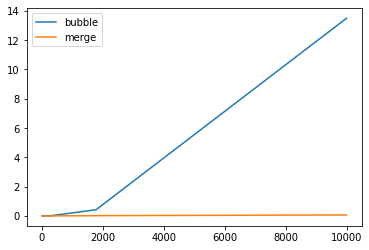

In [ ]:
# Plotting the time difference in execution of both sorting methods
plt.figure()
plt.plot(space, time_taken, label='bubble')
plt.plot(space, time_taken2, label='merge')
# plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.show()

## Bubble sort best and worst case scenarios

In [ ]:
# Best case scenario: already sorted list
best_case_bubble = list(range(1, 1001))

# Worst case scenario: reversed list
worst_case_bubble = best_case_bubble[:]
worst_case_bubble.reverse()

best_case_bubble[:5], worst_case_bubble[:5]

([1, 2, 3, 4, 5], [1000, 999, 998, 997, 996])

In [ ]:
strt = time.perf_counter()
bubbleSort(best_case_bubble)
end = time.perf_counter()
print(end-strt)
print(best_case_bubble[:5])

0.0003531519978423603
[1, 2, 3, 4, 5]


In [ ]:
strt = time.perf_counter()
bubbleSort(worst_case_bubble)
end = time.perf_counter()
print(end-strt)
print(worst_case_bubble[:5])

0.18767409099746146
[1, 2, 3, 4, 5]


## Merge sort best and worst case scenarios

In [ ]:
# Best case scenario: already sorted list
best_case_merge = list(range(1, 1001))

# Worst case scenario: reversed list
worst_case_merge = best_case_merge[:]
worst_case_merge.reverse()

best_case_merge[:5], worst_case_merge[:5]

([1, 2, 3, 4, 5], [1000, 999, 998, 997, 996])

In [ ]:
strt = time.perf_counter()
mergeSort(best_case_merge)
end = time.perf_counter()
print(end-strt)
print(best_case_merge[:5])

0.006832473998656496
[1, 2, 3, 4, 5]


In [ ]:
strt = time.perf_counter()
mergeSort(worst_case_merge)
end = time.perf_counter()
print(end-strt)
print(worst_case_merge[:5])

0.006102758001361508
[1, 2, 3, 4, 5]
